In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
import pathlib

In [3]:
## Paths Input Here
analysis = '2_way_anova'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/subiculum_atrophy/ad_pd_full_data_gm_z_scores.csv'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    print('I will save to:', out_dir)
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

I will save to: /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/subiculum_atrophy/2_way_anova
I have set pathnames in the Mac style


In [4]:

#----------------------------------------------------------------user input above----------------------------------------------------------------
data_df = pd.read_csv(conn_path)

#Prepare the dataframe for statsmodels
data_df = data_df.reset_index(drop=True)
display(data_df)


,"Patient # CDR, ADAS",Age,% Change from baseline (ADAS-Cog11),Subiculum Connectivity,Subiculum Grey Matter,Subiculum White Matter,Subiculum CSF,Subiculum Total,Disease,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital
0,101,62,-21.428571,56.864683,1.646994,0.510111,2.975675,1.280978,Alzheimer,-1.023191,0.996701,-0.761368,1.292918,1.095077,-1.147482
1,102,77,-36.363636,52.970984,-0.865158,-1.615736,0.740780,-1.560273,Alzheimer,-2.856390,-1.100899,-1.443009,-1.521224,-1.833263,-1.845638
2,103,76,-78.947368,62.459631,0.319460,-0.796399,0.532453,-0.341032,Alzheimer,-1.347207,-0.888490,-0.311940,-0.847638,-0.939795,0.179233
3,104,65,-129.411765,59.611631,-0.440643,-0.159752,0.405263,-0.358042,Alzheimer,-2.564422,-0.574506,-1.538464,-0.427482,-1.460534,-0.906022
4,105,50,-10.526316,57.928350,-0.328427,-0.229875,-0.988805,-0.339817,Alzheimer,-1.191519,-1.272936,-1.830548,0.129338,-0.729429,-0.060613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,30_MD_STN_WUE,58,-1.388889,18.674670,6.973009,2.352260,6.973009,0.872723,Parkinson,2.852375,5.232359,2.912696,4.106968,2.966567,1.973524
72,31_MD_STN_WUE,64,1.449275,15.353030,-8.205764,5.376292,-8.205764,8.959061,Parkinson,-9.459474,-9.775730,-10.219665,-9.374411,-8.511720,-9.573909
73,33_MD_STN_WUE,60,-1.398601,15.050219,9.086053,0.302823,9.086053,1.435556,Parkinson,3.638776,3.107560,5.125421,3.789381,4.226254,3.277476
74,36_MD_STN_WUE,52,-2.797203,17.382020,8.416993,1.409619,8.416993,-0.365509,Parkinson,4.082959,5.261292,5.782189,4.624409,5.334244,3.782229


In [5]:
print(data_df.columns)

Index(['Patient # CDR, ADAS', 'Age', '% Change from baseline (ADAS-Cog11)',
       'Subiculum Connectivity', 'Subiculum Grey Matter',
       'Subiculum White Matter', 'Subiculum CSF', 'Subiculum Total', 'Disease',
       'Temporal', 'Frontal', 'Parietal', 'Cerebellum', 'Insula', 'Occipital'],
      dtype='object')


In [6]:
data_df = data_df.loc[:, ['Age', '% Change from baseline (ADAS-Cog11)',
       'Subiculum Connectivity', 'Subiculum Grey Matter',
       'Subiculum White Matter', 'Subiculum CSF', 'Subiculum Total',
       'Disease']]
data_df

,Age,% Change from baseline (ADAS-Cog11),Subiculum Connectivity,Subiculum Grey Matter,Subiculum White Matter,Subiculum CSF,Subiculum Total,Disease
0,62,-21.428571,56.864683,1.646994,0.510111,2.975675,1.280978,Alzheimer
1,77,-36.363636,52.970984,-0.865158,-1.615736,0.740780,-1.560273,Alzheimer
2,76,-78.947368,62.459631,0.319460,-0.796399,0.532453,-0.341032,Alzheimer
3,65,-129.411765,59.611631,-0.440643,-0.159752,0.405263,-0.358042,Alzheimer
4,50,-10.526316,57.928350,-0.328427,-0.229875,-0.988805,-0.339817,Alzheimer
...,...,...,...,...,...,...,...,...
71,58,-1.388889,18.674670,6.973009,2.352260,6.973009,0.872723,Parkinson
72,64,1.449275,15.353030,-8.205764,5.376292,-8.205764,8.959061,Parkinson
73,60,-1.398601,15.050219,9.086053,0.302823,9.086053,1.435556,Parkinson
74,52,-2.797203,17.382020,8.416993,1.409619,8.416993,-0.365509,Parkinson


Remove any subjects which should not be included

In [7]:
outlier_index=[11, 47, 48, 49]
data_df = data_df.drop(index=outlier_index)

Standardize the Data -- Optional but recommended

In [8]:
#standardize you data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
data_df.iloc[:,:] = scaler.fit_transform(data_df.iloc[:,:].values)

ValueError: could not convert string to float: 'Alzheimer'

In [9]:
#Drop NANs
if data_df.isna().any().any():
    print('You should handle the NaNs in your dataframe with this code: \n "data_df.dropna(inplace=True)"')
else:
    print('No NaNs found in dataframe')
# data_df.dropna(inplace=True)

No NaNs found in dataframe


# Manipulation, Creation, and Binzarization of Variables 
- This is mandatory data pre-processing

Rename a column to 'outcome' -- mandatory

In [10]:
# Set continuous variable of interest the name 'outcome'
outcome = '% Change from baseline (ADAS-Cog11)'
rename = data_df.pop(outcome)
data_df['outcome'] = rename
data_df.head(1)

,Age,Subiculum Connectivity,Subiculum Grey Matter,Subiculum White Matter,Subiculum CSF,Subiculum Total,Disease,outcome
0,62,56.864683,1.646994,0.510111,2.975675,1.280978,Alzheimer,-21.428571


Create new column -- optional

In [ ]:
#Manually Create a new variable
new_column = 'Stimulation_Atrophy_Match'
col1 = 'Subiculum Connectivity'
col2 = 'Subiculum Grey Matter'

#If you want to binarize the new variable, enter here
binarize_new_column = True
binarizing_threshold_choices = ['0', 'np.mean(data_df[new_column])'] #don't touch this. 
binarizing_choice = binarizing_threshold_choices[0] #Choice between zero and mean
under_mean = 'Mismatch'
over_mean = 'Match'

#----------------------------------------------------------------DO NOT TOUCH

data_df[new_column] = data_df[col1] * data_df[col2]
if binarize_new_column:
    data_df[new_column] = np.where(data_df[new_column] < eval(binarizing_choice), under_mean, over_mean)
data_df

Binarize columns as needed -- optional
This will walk you through it

In [ ]:
#Manually Create a new variable
col_to_binarize = 'Age'
custom_binarizing_string = 'Alzheimer'

#Choose byy what operator to binarize
binarizing_operator_list = ['<', '>', '<=', '>=', '==', '!='] #don't touch this
operator_choice = binarizing_operator_list[3]

#Choose how to binarize
binarizing_threshold_choice = ['0', 'np.mean(data_df[col_to_binarize])', f'{custom_binarizing_string}'] #don't touch this. 
binarizing_choice = binarizing_threshold_choices[1] #Choice between zero and mean

#Choose how to label your binarization data
under_mean = 'Young'
over_mean = 'Old'

#----------------------------------------------------------------DO NOT TOUCH
data_df[col_to_binarize] = np.where(data_df['Age'] < 0, under_mean, over_mean)
data_df

# Begin Analysis

In [11]:
print(data_df.columns)

Index(['Age', 'Subiculum Connectivity', 'Subiculum Grey Matter',
       'Subiculum White Matter', 'Subiculum CSF', 'Subiculum Total', 'Disease',
       'outcome'],
      dtype='object')


In [21]:
index_column = 'Disease'
dep_var_type = ['Subiculum Connectivity']
dep_var_category = 'Categorical name'
measurement_category = 'Associated Category Value'

#-------------------------------------------------------------------    


# Copy the dataframe to avoid changing the original data
df_to_melt = data_df.copy()

# Melt dataframe
melted_df = pd.melt(df_to_melt, id_vars=index_column, value_vars=dep_var_type, var_name=dep_var_category, value_name=measurement_category)
melted_df

display(melted_df)

,Disease,Categorical name,Associated Category Value
0,Alzheimer,Subiculum Connectivity,56.864683
1,Alzheimer,Subiculum Connectivity,52.970984
2,Alzheimer,Subiculum Connectivity,62.459631
3,Alzheimer,Subiculum Connectivity,59.611631
4,Alzheimer,Subiculum Connectivity,57.928350
...,...,...,...
67,Parkinson,Subiculum Connectivity,18.674670
68,Parkinson,Subiculum Connectivity,15.353030
69,Parkinson,Subiculum Connectivity,15.050219
70,Parkinson,Subiculum Connectivity,17.382020


In [22]:
#Info
df_to_melt_info = df_to_melt.describe().transpose()
display(df_to_melt_info)

,count,mean,std,min,25%,50%,75%,max
Age,72.0,63.750000,9.044102,46.000000,57.750000,64.000000,72.000000,79.000000
Subiculum Connectivity,72.0,51.346147,22.727710,15.050219,27.750366,60.995631,69.813800,85.082502
Subiculum Grey Matter,72.0,1.651964,4.099511,-8.205764,-0.967316,-0.039948,4.571221,11.802522
Subiculum White Matter,72.0,0.117767,1.272232,-1.854694,-0.780483,-0.086861,0.544250,5.376292
Subiculum CSF,72.0,2.702383,3.517001,-8.205764,0.531983,1.333879,4.571221,11.802522
Subiculum Total,72.0,0.670358,2.166939,-2.144075,-0.801816,-0.035137,1.450673,8.959061
outcome,72.0,-24.173205,43.251602,-207.692308,-37.740385,-5.217832,0.000000,54.545455


## Option A - Generate a Boxplot with Tukey HSD Post Hoc for a given effect

## Generate a Tukey HSD Post Hoc

In [328]:
# Statsmodels Tukey
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Step 1: Two-way ANOVA
formula = f'Q("{measurement_category}") ~ C(Q("{index_column}")) + C(Q("{dep_var_category}")) + C(Q("{index_column}")):C(Q("{dep_var_category}"))'
model = ols(formula, data=melted_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table to see the indices
display(anova_table)



ValueError: must have at least one row in constraint matrix

In [329]:

#----------------------------------------------------------------DO NOT CHANGE BELOW

# Step 2: Post-hoc tests if interaction is significant
# First, check the ANOVA table indices and then access the appropriate index.
# For example, if the index is 'Age:Network' use that to access the p-value
interaction_index = f'C(Q("{index_column}")):C(Q("{dep_var_category}"))'  # change this based on the printed ANOVA table



# Perform Tukey's HSD test
# tukey = pairwise_tukeyhsd(endog=df['Damage Score'],
#                           groups=df['Cohort_Lobe'],
#                           alpha=0.05)

# Step 2: Post-hoc tests if interaction is significant
if anova_table.loc[interaction_index, 'PR(>F)'] < 0.05:
    
    pre_tukey_df = melted_df.copy()
    # Create a new column combining Cohort and Lobe information
    pre_tukey_df['Combined_Column'] = pre_tukey_df[index_column] + '_' + pre_tukey_df[dep_var_category]
    
    # Perform Tukey's test
    tukey = pairwise_tukeyhsd(endog=pre_tukey_df[measurement_category],
                              groups=pre_tukey_df['Combined_Column'],
                              alpha=0.05)
    
    # Create a DataFrame from the Tukey's test summary
    tukey_df = pd.DataFrame(data=tukey.summary()[1:], columns=tukey.summary()[0])
    
    # Display the results of the Tukey's test
    display(tukey_df)
else:
    print("The interaction was not significant")


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Alzheimer_Age,Parkinson_Age,-8.699,0.0,-12.6445,-4.7535,True


In [330]:
print(tukey_df.columns[0])



group1


In [331]:
#----------------DO NOT TOUCH
group1_column = tukey_df.columns[0]
group2_column = tukey_df.columns[1]


# Convert columns to string type
tukey_df[group1_column] = tukey_df[group1_column].astype(str)
tukey_df[group2_column] = tukey_df[group2_column].astype(str)

# Function to extract the lobe part from the combined column
def extract_lobe(group):
    return '_'.join(group.split('_')[1:])

# Filter the rows where the lobe part is the same, but the cohort part is different
filtered_df = tukey_df[
    (tukey_df[group1_column].map(extract_lobe) == tukey_df[group2_column].map(extract_lobe)) &
    (tukey_df[group1_column].map(lambda x: x.split('_')[0]) != tukey_df[group2_column].map(lambda x: x.split('_')[0]))
]

# Display the filtered DataFrame
display(filtered_df)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Alzheimer_Age,Parkinson_Age,-8.699,0.0,-12.6445,-4.7535,True


ValueError: Must be a color for each trace level

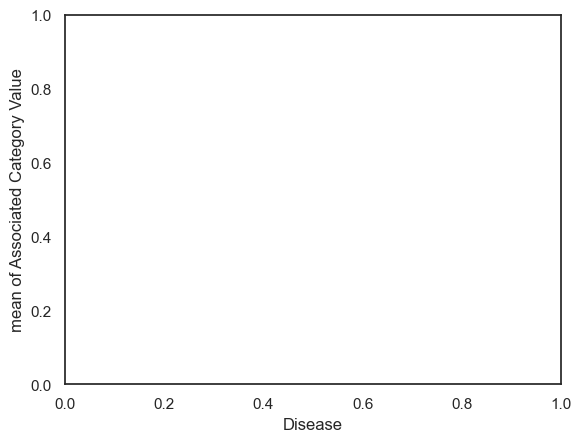

In [332]:
#Visualize interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
intrxn_plot = interaction_plot(x=melted_df[index_column], trace=melted_df[dep_var_category], response=melted_df[measurement_category])#, colors=colors)
intrxn_plot.set_size_inches(5, 7, forward=True)

ValueError: too many values to unpack (expected 2)

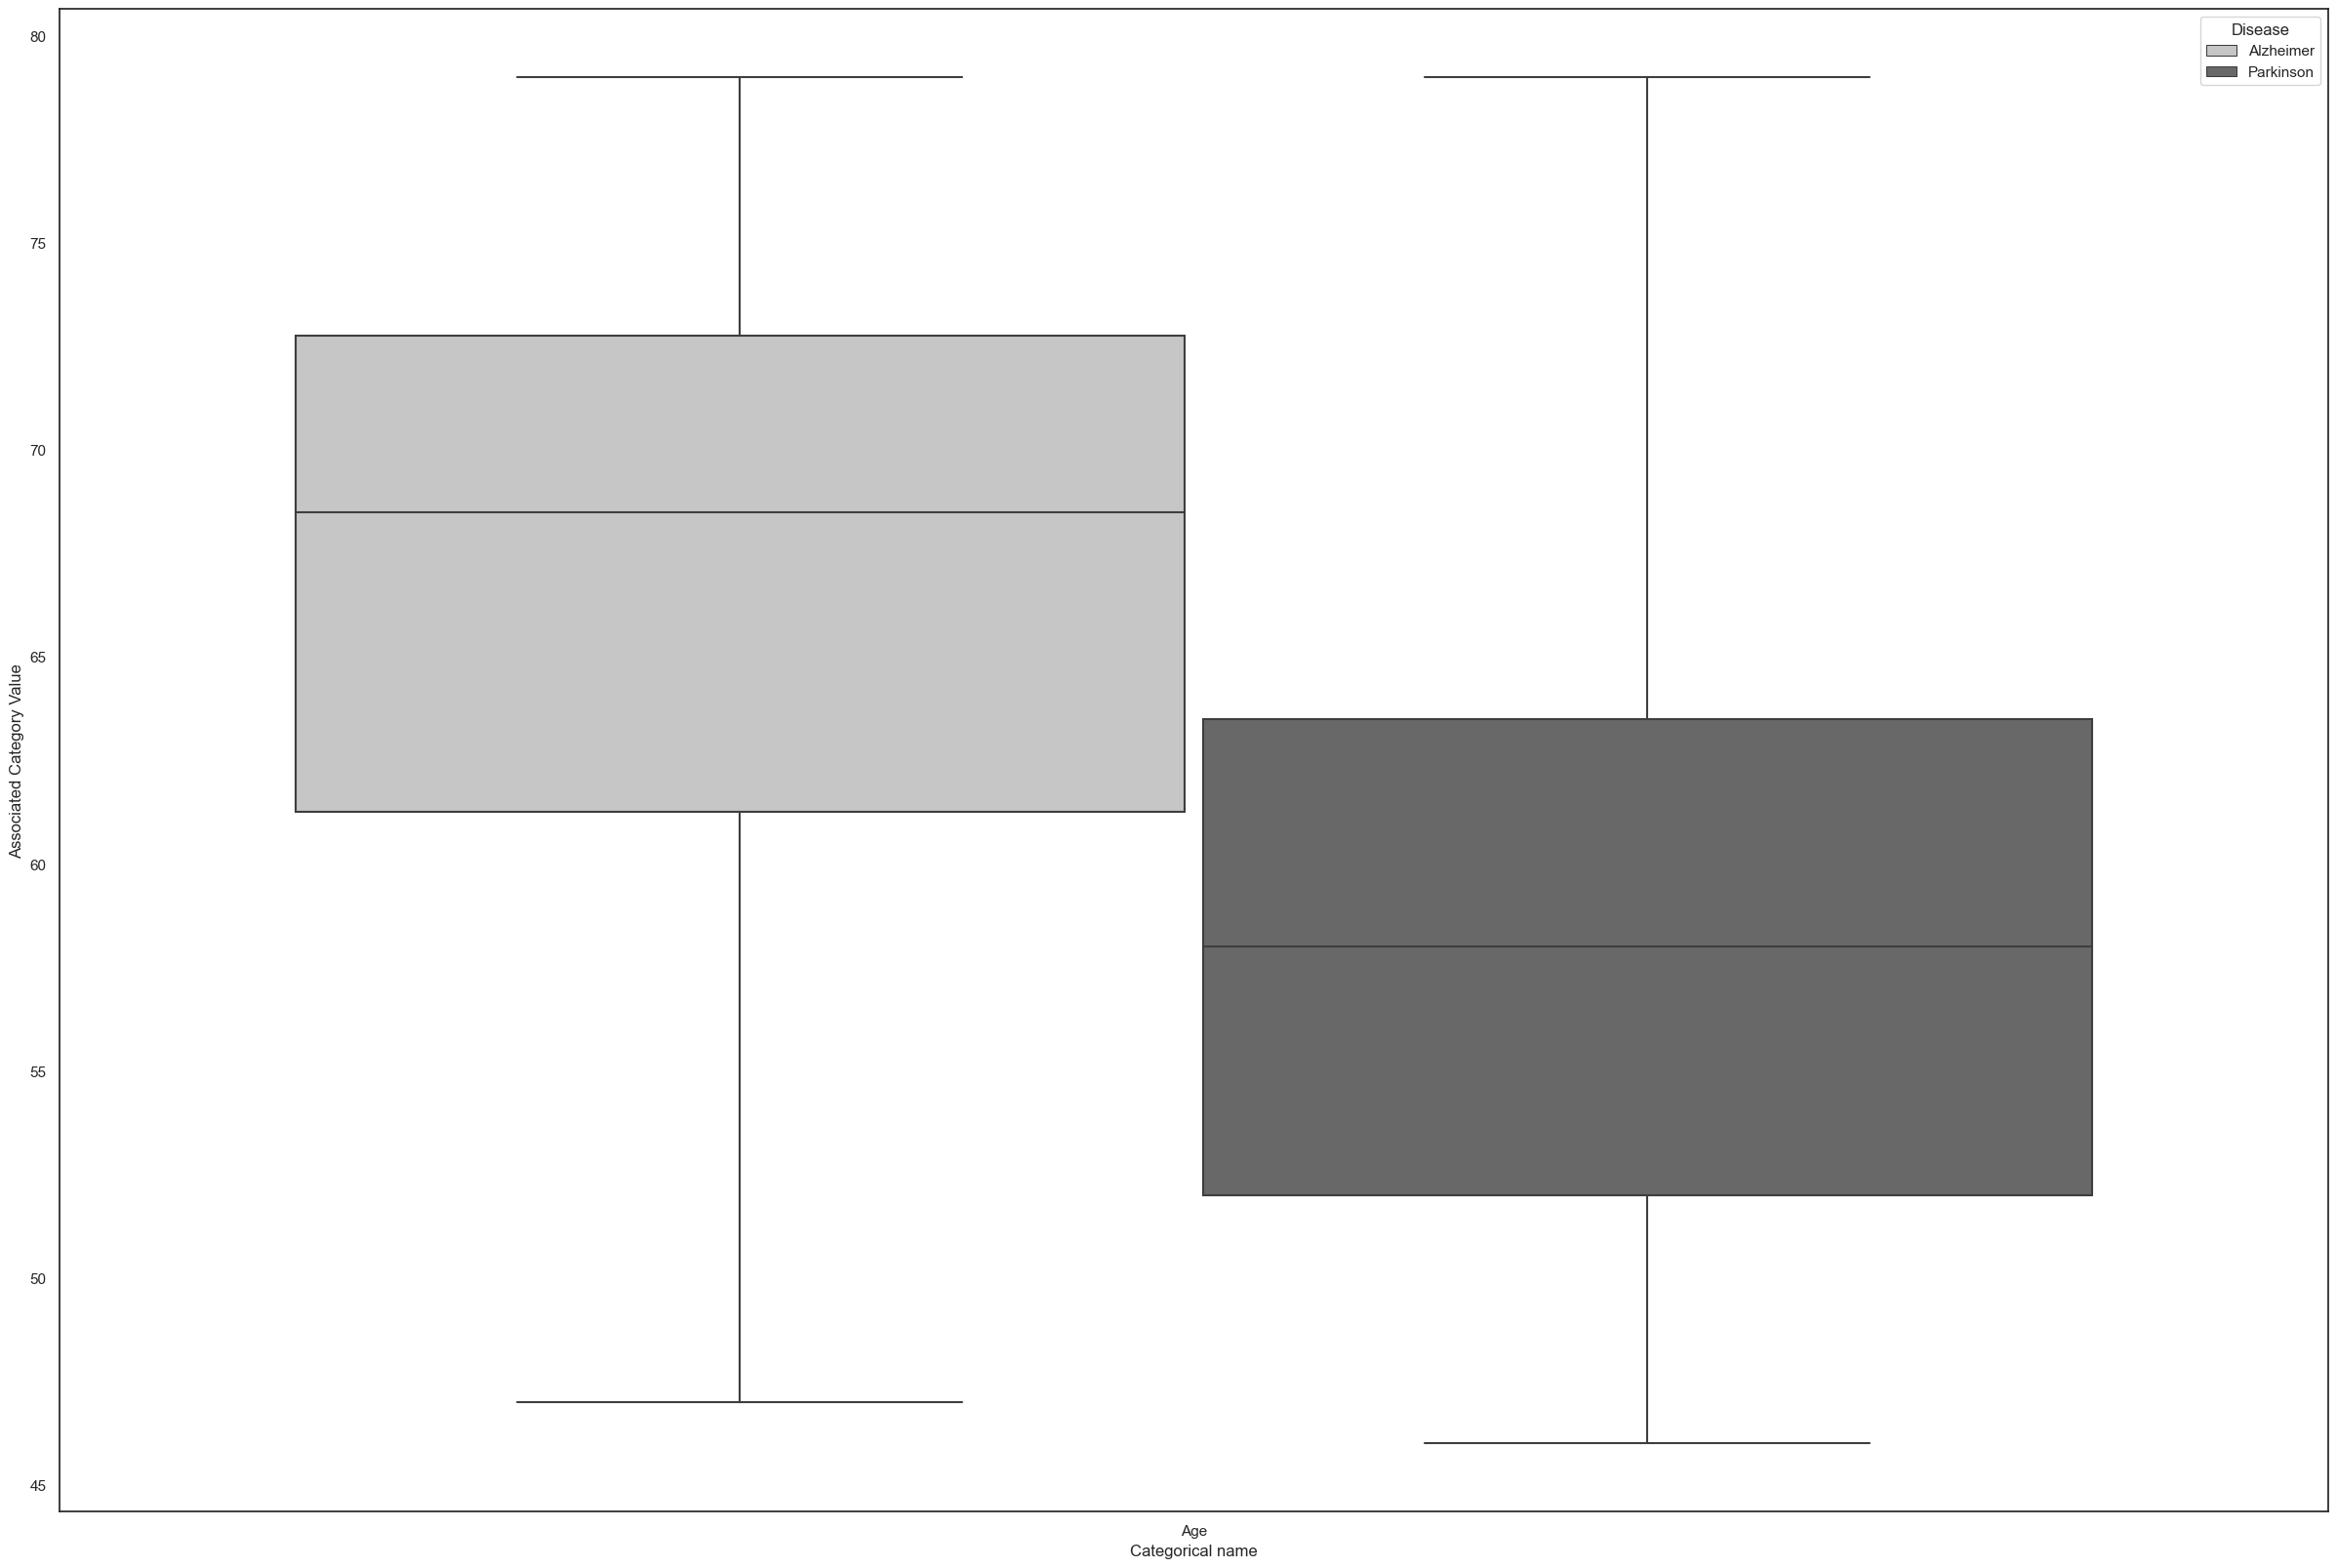

In [333]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

x_label = 'Lobe'
y_label = 'Damage Score'
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
# Assuming filtered_df is already defined with your data
# Extract pairs and p-values from filtered_df
pairs = [(f"{row[filtered_df.columns[0]]}", 
          f"{row[filtered_df.columns[1]]}") 
          for _, row in filtered_df.iterrows()]

# pairs = [(f"{row[filtered_df[filtered_df.columns[0]]]}", 
#           f"{row[filtered_df[filtered_df.columns[1]]]}") 
#           for _, row in filtered_df.iterrows()]

# pairs = [(f"{row[filtered_df[filtered_df.columns[0]]]}_{row[dep_var_category]}", 
#           f"{row[filtered_df[filtered_df.columns[1]]]}_{row[dep_var_category]}") 
#           for _, row in filtered_df.iterrows()]

# Convert p-values to float
p_values = [float(str(row[filtered_df.columns[3]])) for _, row in filtered_df.iterrows()]

# Create figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Plot with seaborn, using 'hue' to differentiate between Alzheimer's and Parkinson's within each Lobe
sns.boxplot(data=melted_df, x=dep_var_category, y=measurement_category, hue=index_column, ax=ax)

# Add annotations using statannotations
annotator = Annotator(ax, pairs=pairs, data=melted_df, x=dep_var_category, y=measurement_category, hue=index_column)
annotator.configure(test=None, text_format="star", loc="inside", verbose=2)
annotator.set_pvalues(p_values)
annotator.annotate()

# Label and show
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.xticks(rotation=45)
plt.legend(title=index_column, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Alzheimer_Age vs. Parkinson_Age: Custom statistical test, P_val:0.000e+00


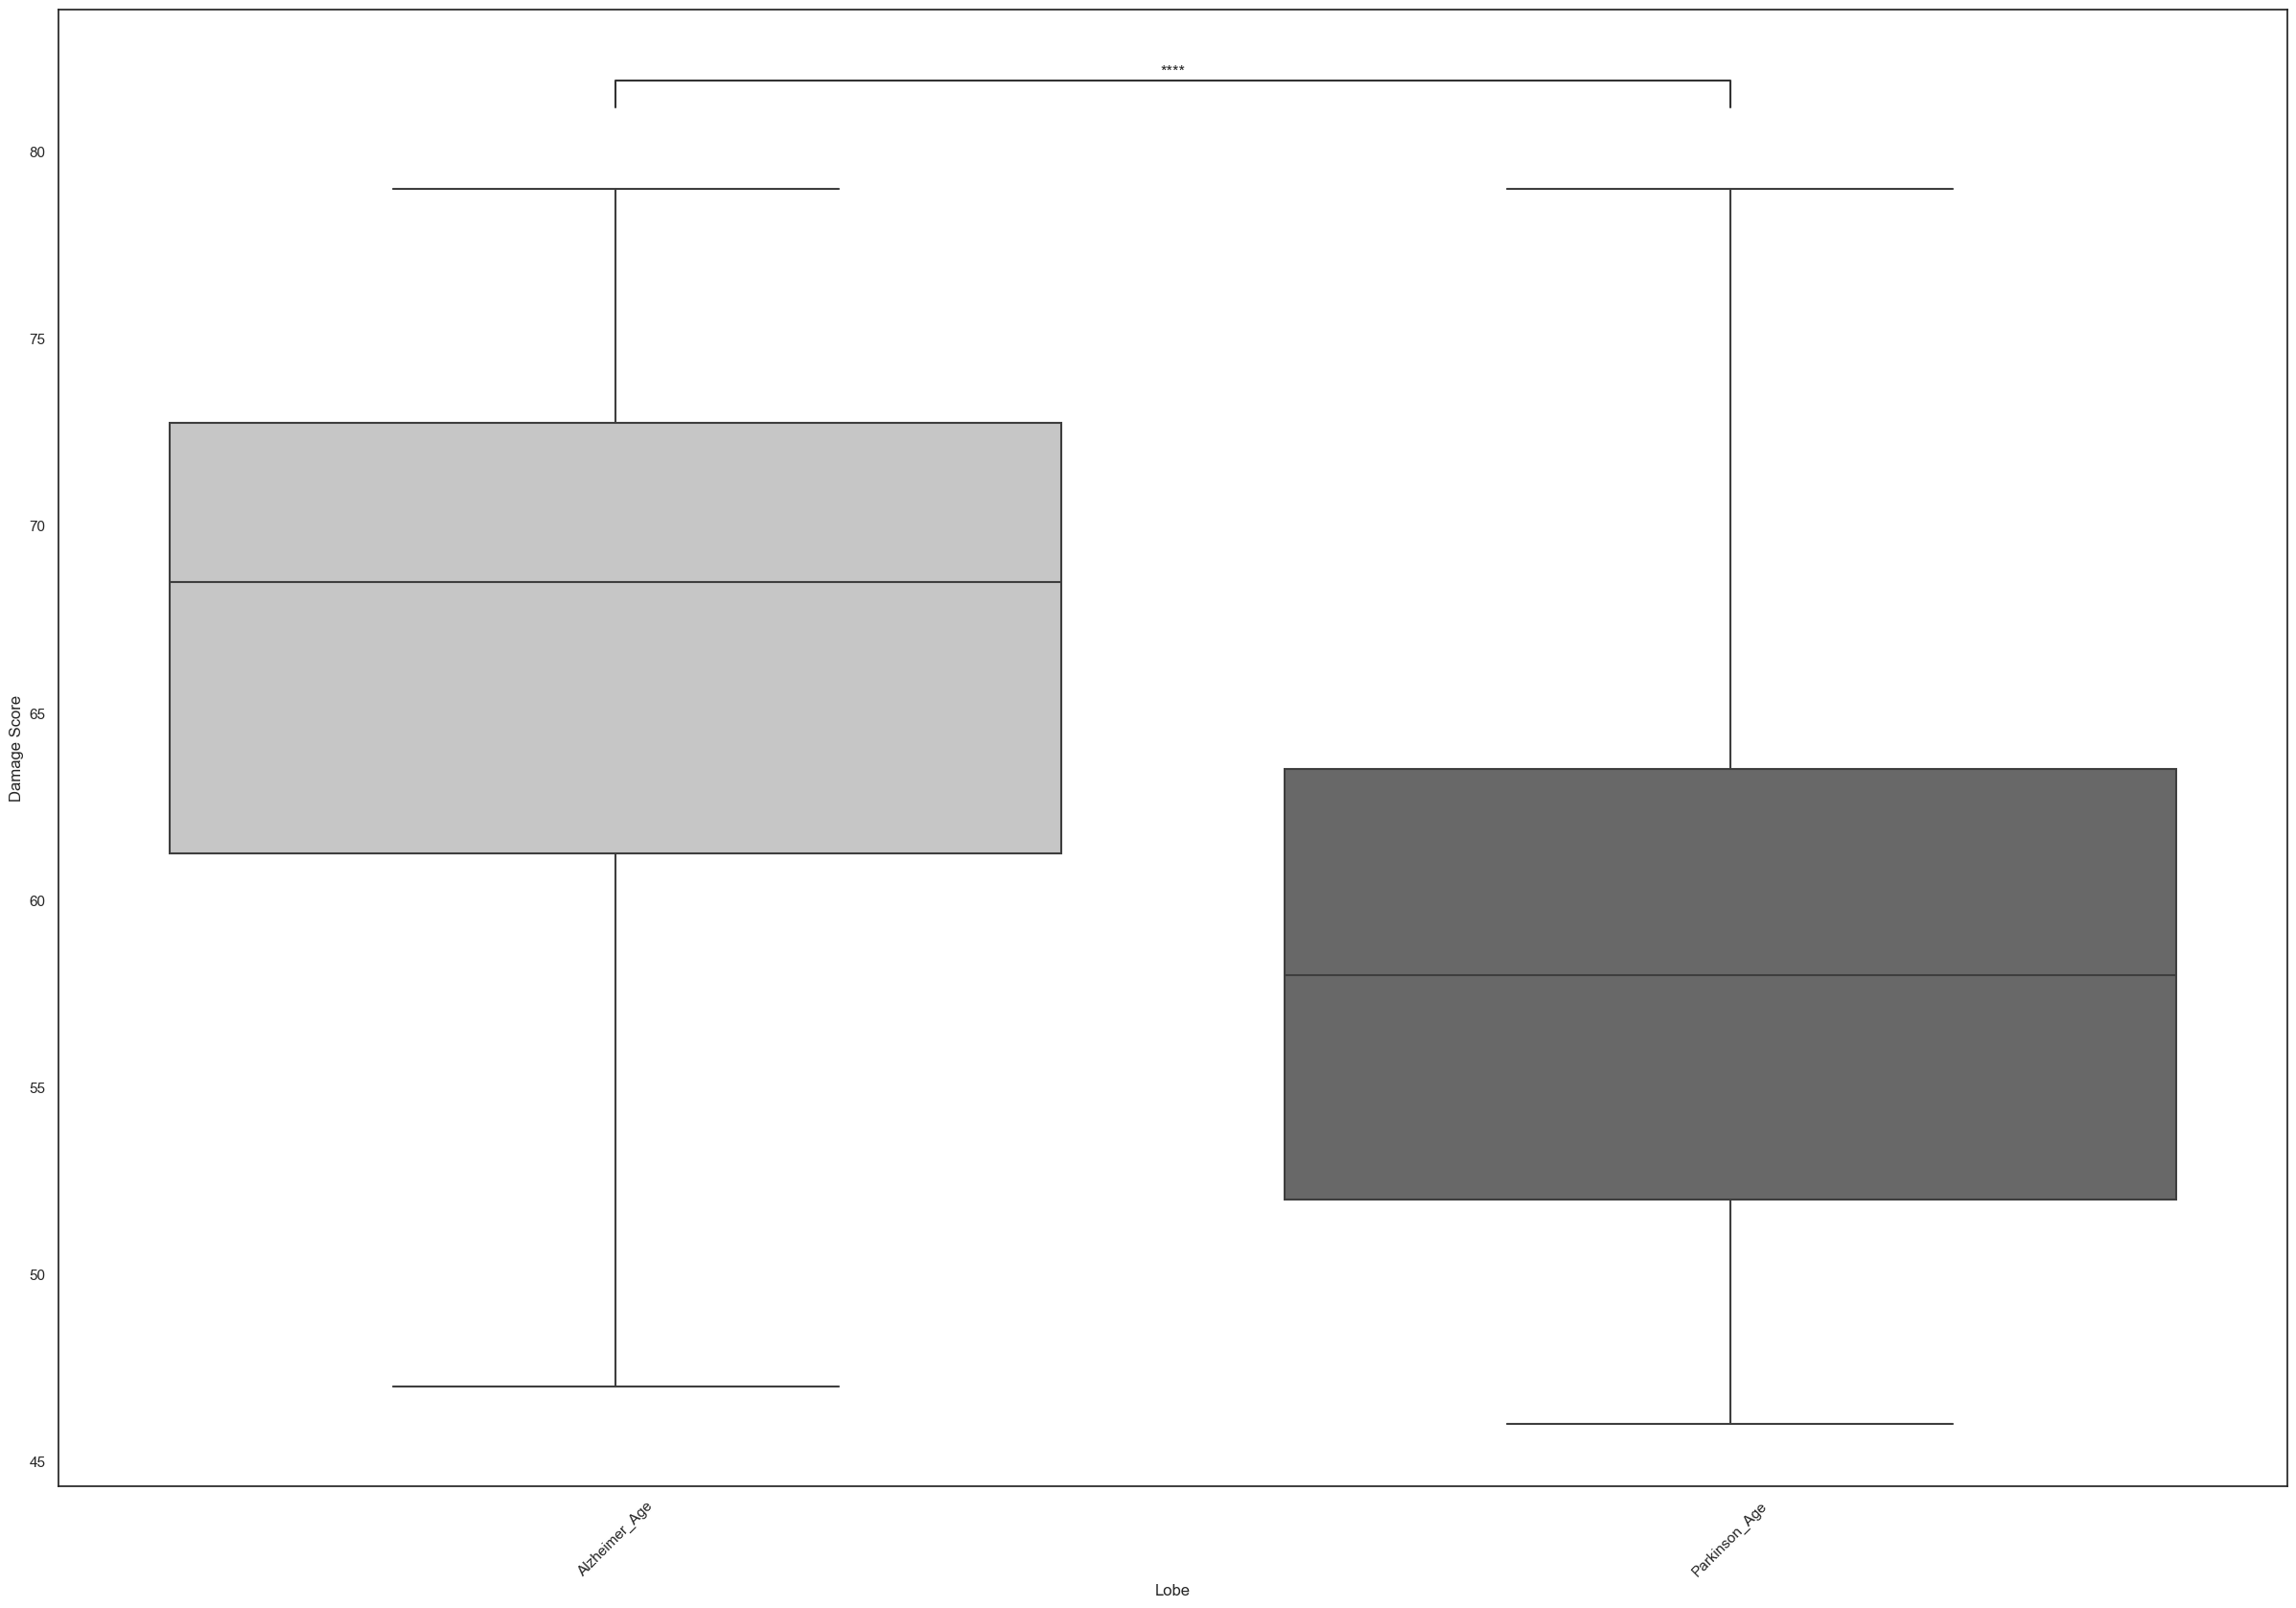

In [334]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

x_label = 'Lobe'
y_label = 'Damage Score'
#----------------------------------------------------------------DO NOT MODIFY----------------------------------------------------------------
# Assuming melted_df is already defined with your data
melted_df['combined_group'] = melted_df[index_column] + '_' + melted_df[dep_var_category]

# Assuming filtered_df is already defined with your data
# Extract pairs and p-values from filtered_df
pairs = [(row[filtered_df.columns[0]], row[filtered_df.columns[1]]) for _, row in filtered_df.iterrows()]

# Convert p-values to float
p_values = [float(str(row[filtered_df.columns[3]])) for _, row in filtered_df.iterrows()]

# Create figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Plot with seaborn
sns.boxplot(data=melted_df, x='combined_group', y=measurement_category, ax=ax)

# Add annotations using statannotations
annotator = Annotator(ax, pairs=pairs, data=melted_df, x='combined_group', y=measurement_category)
annotator.configure(test=None, text_format="star", loc="inside", verbose=2)
annotator.set_pvalues(p_values)
annotator.annotate()

# Label and show
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.xticks(rotation=45)
plt.show()


## Option B - This is more like distribution testing (T-tests, wilcoxon tests, etc) 
- run normality testing to help choose a main test
- choose main test
- choose multiple corrections test
- generate a box plot
- annotate it

Assess Normality to Determine what Test to Use

In [23]:
import scipy.stats as stats

# Assuming melted_df is your DataFrame, and you have columns named dependent_var_column and index_column

# Getting unique values from dependent_var_column
unique_dependent_vars = melted_df[dep_var_category].unique()

# Iterating through each unique value in dependent_var_column
for unique_var in unique_dependent_vars:
    # Filtering data for current unique dependent_var
    sub_df = melted_df[melted_df[dep_var_category] == unique_var]
    
    # Finding distinct index_column groups
    index_groups = sub_df[index_column].unique()
    
    # Checking normality for each group
    for index_group in index_groups:
        group_data = sub_df[sub_df[index_column] == index_group][measurement_category]
        
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = stats.shapiro(group_data)
        
        # Anderson-Darling test
        anderson_result = stats.anderson(group_data)
        
        print(f'For {unique_var}, {index_group}:')
        print(f'Shapiro-Wilk: statistic={shapiro_stat}, p-value={shapiro_p}')
        print(f'Anderson-Darling: statistic={anderson_result.statistic}, critical values={anderson_result.critical_values}, significance_levels={anderson_result.significance_level}')
        print('--------------------------')

# After checking for normality, you can decide whether to use Mann-Whitney U test or t-test


For Subiculum Connectivity, Alzheimer:
Shapiro-Wilk: statistic=0.9925535321235657, p-value=0.9909945726394653
Anderson-Darling: statistic=0.1399568525642536, critical values=[0.536 0.61  0.732 0.854 1.016], significance_levels=[15.  10.   5.   2.5  1. ]
--------------------------
For Subiculum Connectivity, Parkinson:
Shapiro-Wilk: statistic=0.9116063714027405, p-value=0.028699606657028198
Anderson-Darling: statistic=0.7591955034856035, critical values=[0.516 0.587 0.705 0.822 0.978], significance_levels=[15.  10.   5.   2.5  1. ]
--------------------------


In [24]:
import pandas as pd
import scipy.stats as stats

# Create an empty DataFrame to store the results
normality_results = pd.DataFrame(columns=['dependent_var', 'index_group', 'shapiro_stat', 'shapiro_p', 'anderson_stat', 'anderson_critical_values', 'anderson_significance_levels'])

# Getting unique values from dependent_var_column
unique_dependent_vars = melted_df[dep_var_category].unique()

# Iterating through each unique value in dependent_var_column
for unique_var in unique_dependent_vars:
    # Filtering data for current unique dependent_var
    sub_df = melted_df[melted_df[dep_var_category] == unique_var]
    
    # Finding distinct index_column groups
    index_groups = sub_df[index_column].unique()
    
    # Checking normality for each group
    for index_group in index_groups:
        group_data = sub_df[sub_df[index_column] == index_group][measurement_category]
        
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = stats.shapiro(group_data)
        
        # Anderson-Darling test
        anderson_result = stats.anderson(group_data)
        
        # Append the results to the DataFrame
        normality_results = normality_results.append({
            'dependent_var': unique_var,
            'index_group': index_group,
            'shapiro_stat': shapiro_stat,
            'shapiro_p': shapiro_p,
            'anderson_stat': anderson_result.statistic,
            'anderson_critical_values': anderson_result.critical_values,
            'anderson_significance_levels': anderson_result.significance_level
        }, ignore_index=True)

normality_results

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_26385/3735261075.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_results = normality_results.append({
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_26385/3735261075.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_results = normality_results.append({


,dependent_var,index_group,shapiro_stat,shapiro_p,anderson_stat,anderson_critical_values,anderson_significance_levels
0,Subiculum Connectivity,Alzheimer,0.992554,0.990995,0.139957,"[0.536, 0.61, 0.732, 0.854, 1.016]","[15.0, 10.0, 5.0, 2.5, 1.0]"
1,Subiculum Connectivity,Parkinson,0.911606,0.028700,0.759196,"[0.516, 0.587, 0.705, 0.822, 0.978]","[15.0, 10.0, 5.0, 2.5, 1.0]"


In [25]:
from itertools import combinations
# Assuming melted_df is your DataFrame, and you have columns named dependent_var_column and index_column

pairs = []

# Getting unique values from dependent_var_column
unique_dep_vars = melted_df[dep_var_category].unique()

# Getting unique values from index_column
unique_index_vars = melted_df[index_column].unique()

# Iterating through each unique value in dependent_var_column
for dep_var in unique_dep_vars:
    # Generating pairs among index_column groups for the current dependent_var
    for index_group1, index_group2 in combinations(unique_index_vars, 2):
        current_pair = ((index_group1, dep_var), (index_group2, dep_var))
        
        # Adding these pairs to the main list
        pairs.append(current_pair)

# Now pairs will have the desired pairs for plotting
print(pairs)



[(('Alzheimer', 'Subiculum Connectivity'), ('Parkinson', 'Subiculum Connectivity'))]


In [26]:
melted_df[index_column]

0     Alzheimer
1     Alzheimer
2     Alzheimer
3     Alzheimer
4     Alzheimer
        ...    
67    Parkinson
68    Parkinson
69    Parkinson
70    Parkinson
71    Parkinson
Name: Disease, Length: 72, dtype: object

NameError: name 'colors' is not defined

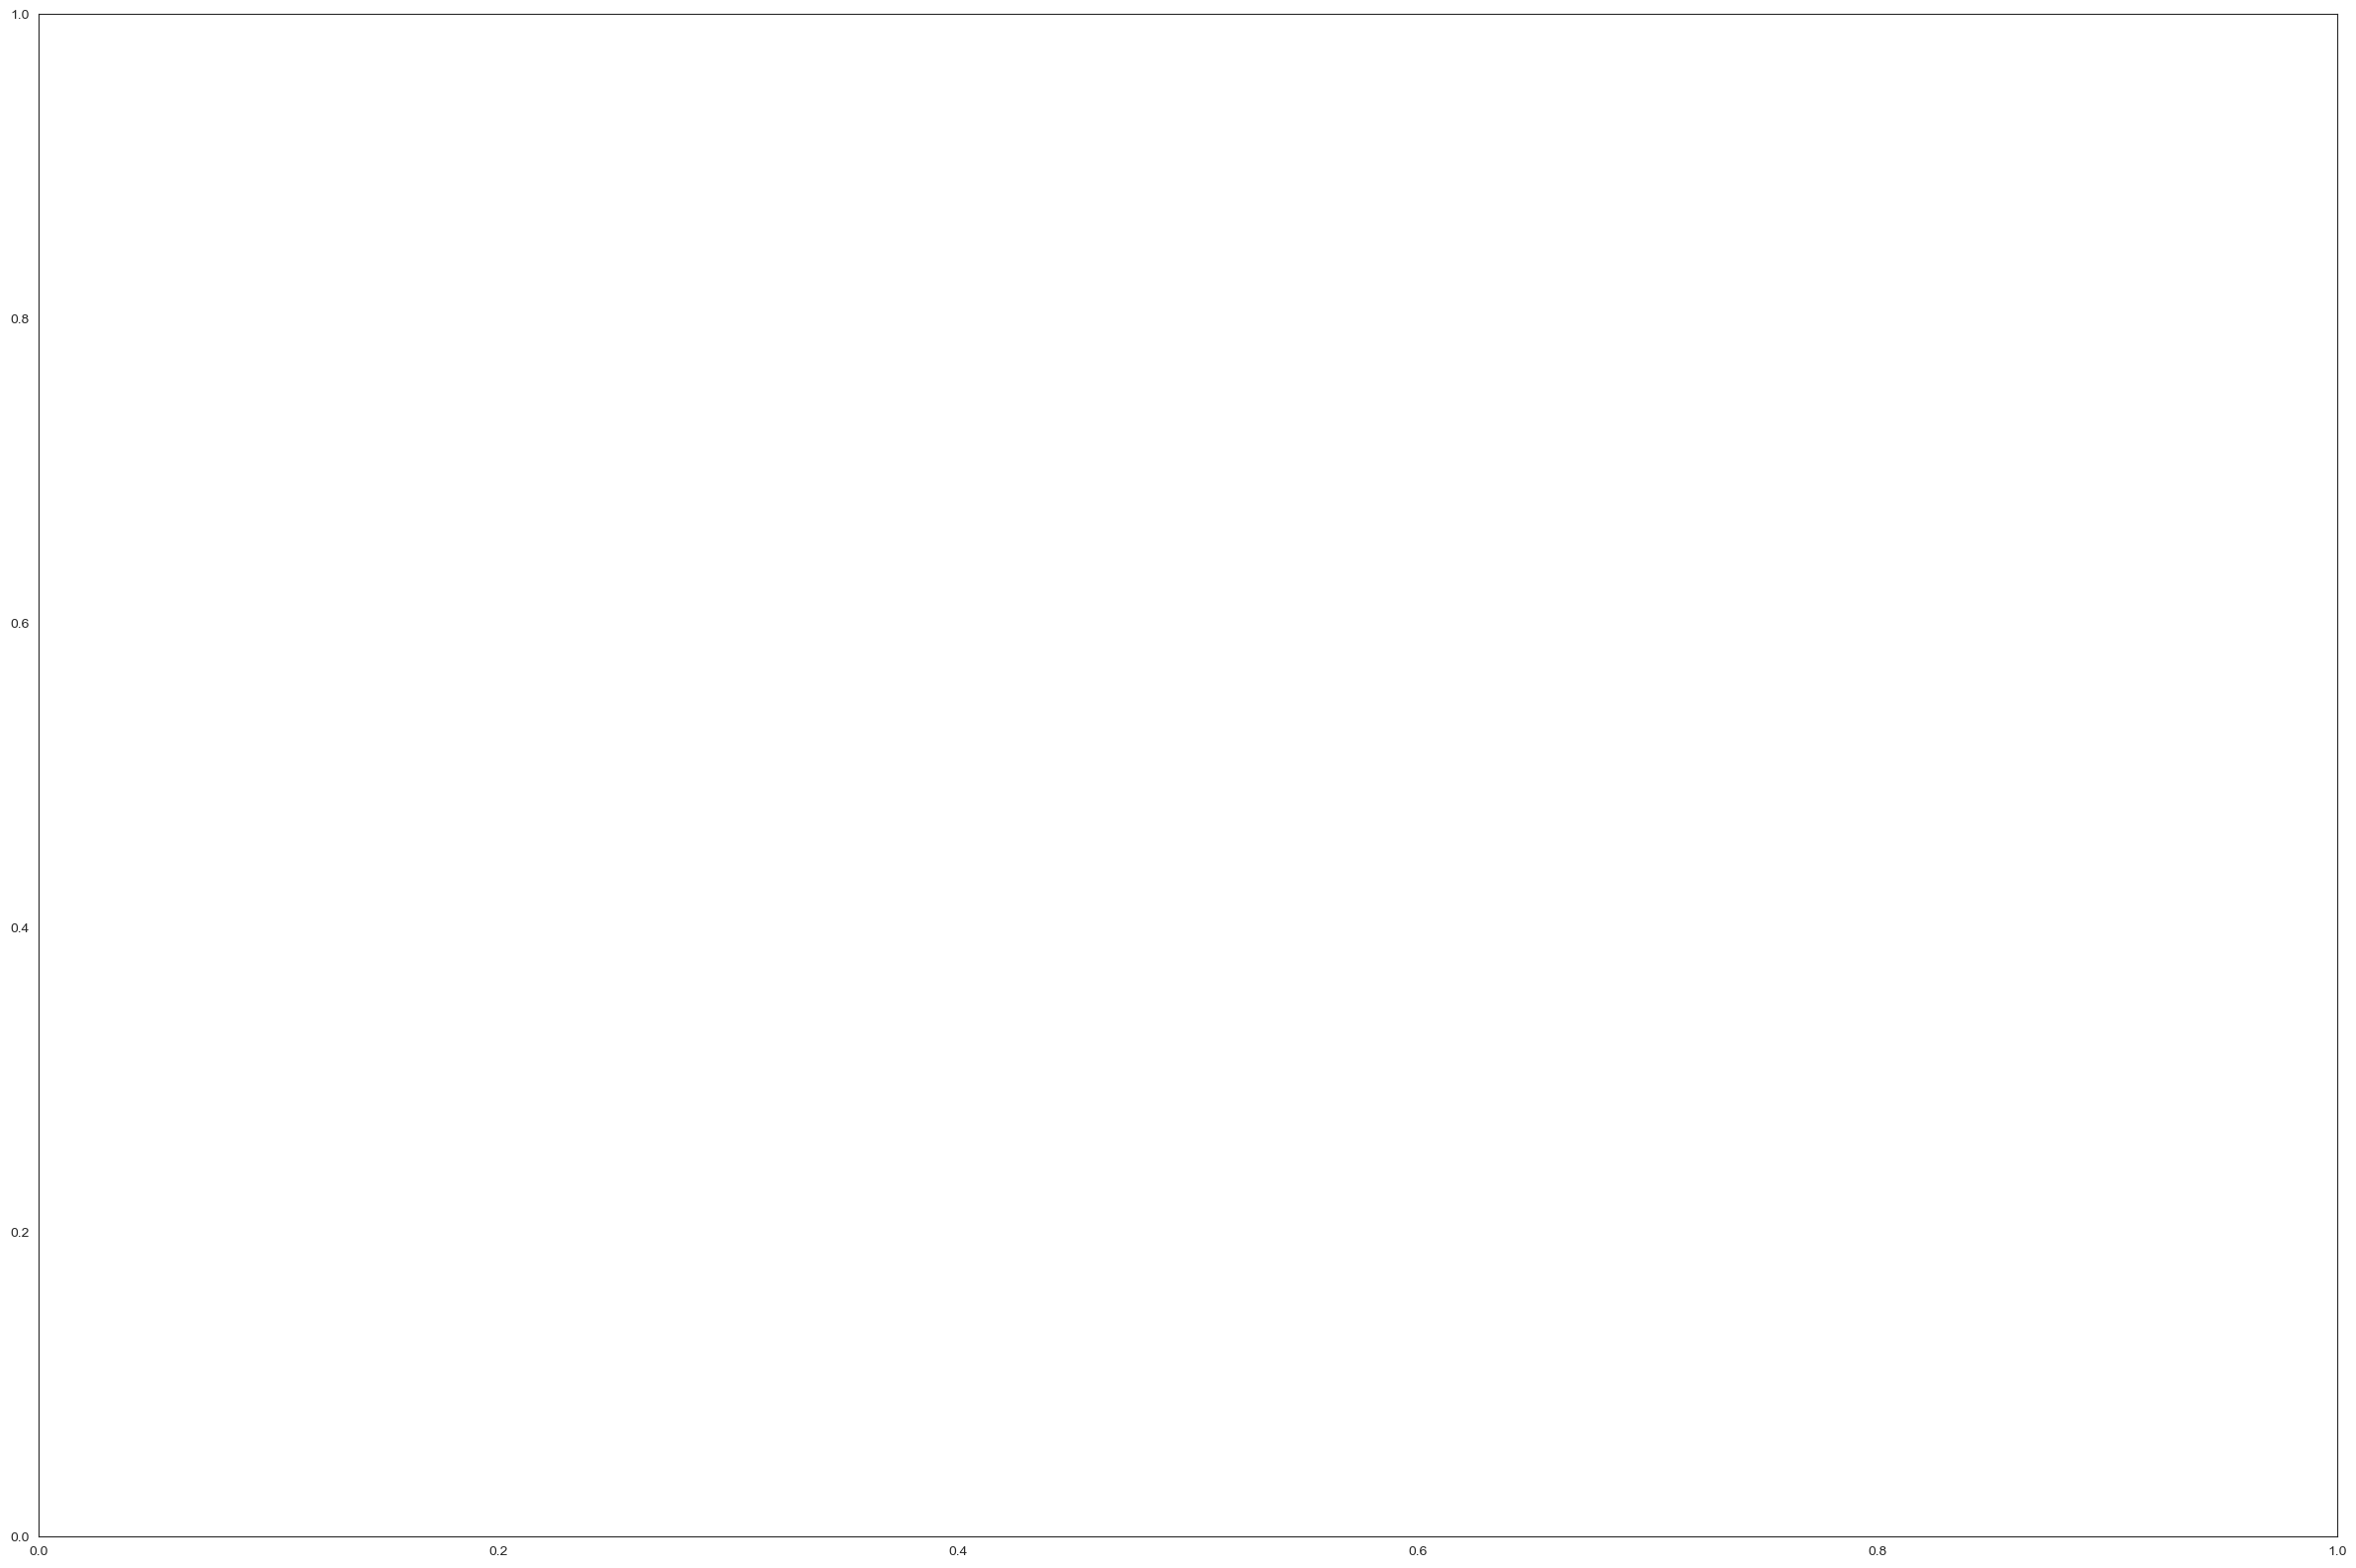

In [27]:
from statannotations.Annotator import Annotator
from statannotations import utils as utils
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# A few helper functions:
import numpy as np
from scipy.stats import mannwhitneyu, normaltest, tukey_hsd, ttest_ind, kruskal, levene, brunnermunzel, wilcoxon
fig2, ax = plt.subplots(1,1, figsize=(30, 20))

main_tests = ['t-test_ind', 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal', 'Brunner-Munzel']
post_hoc_tests = ['bonferroni', 'bonf', 'Bonferroni', 'holm-bonferroni', 'HB', 'Holm-Bonferroni', 'holm', 'benjamini-hochberg', 'BH', 'fdr_bh', 'Benjamini-Hochberg', 'fdr_by', 'Benjamini-Yekutieli', 'BY', None]

##----------------------------------------------------------------USER INPUT BELOW----------------------------------------------------------------
main_test = 'Mann-Whitney'# #main_tests[0]
post_hoc_test = 'bonferroni' #post_hoc_tests[3]
x_label = 'Tissue Segments'
y_label = 'Z Score Mean Volume'
num_categories_tested = 1
##----------------------------------------------------------------USER INPUT ABOVE----------------------------------------------------------------

#Manipulate the pairs generated from stats annotation
customPalette = sns.set_palette(sns.color_palette(colors))
hue_plot_params = {
    'data': melted_df,
    'x': index_column,
    'y': measurement_category,
    "hue": dep_var_category,
    "palette": customPalette
}

with sns.plotting_context("notebook", font_scale=1.4):
        # Plot with seaborn
        ax = sns.boxplot(ax=ax, **hue_plot_params)

        # Add annotations
        annotator = Annotator(ax, **hue_plot_params,
                            pairs=pairs,
                        test=main_test, text_format='full', loc='inside', verbose=2)

        #Specific post-hoc test
        # annotator.configure(test="Mann-Whitney", comparisons_correction="bonferroni")
        _, corrected_results = annotator.configure(test=main_test, comparisons_correction=post_hoc_test).apply_and_annotate()

        # Label and show
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        plt.show()


For t-testing

In [28]:
len(melted_df[index_column].unique())

2

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Alzheimer vs. Parkinson: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.472e-12 U_stat=1.196e+03


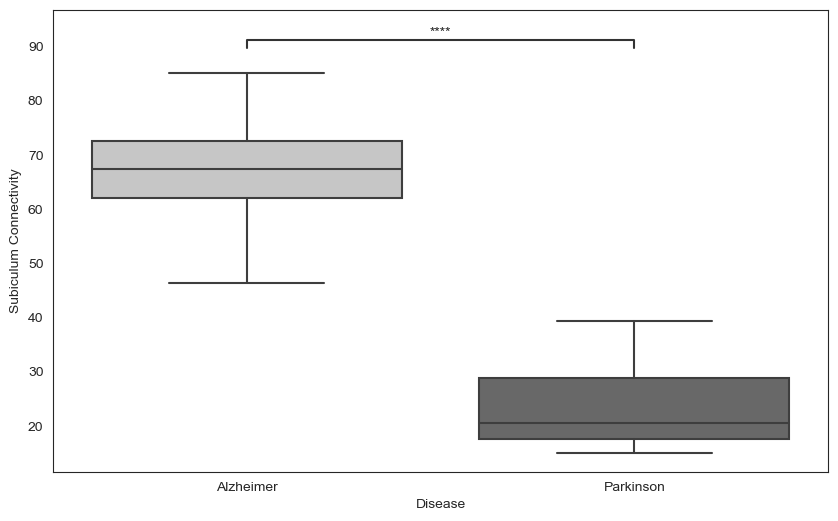

In [30]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

main_test = 'Mann-Whitney'# #main_tests[0]
post_hoc_test = 'bonferroni' #post_hoc_tests[3]
x_label = 'Disease'
y_label = 'Subiculum Connectivity'

##----------------------------------------------------------------USER INPUT ABOVE----------------------------------------------------------------
# Set style and color palette
sns.set_style('white')
sns.set_palette('Greys', len(melted_df[index_column].unique()), desat=1)

# Pairs for comparison
pairs = [("Parkinson", "Alzheimer")]

# Plot parameters
plot_params = {
    'data': melted_df,
    'x': index_column,
    'y': measurement_category,
}

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with seaborn
sns.boxplot(ax=ax, **plot_params)

# Add annotations
annotator = Annotator(ax=ax,
                      data=melted_df,
                      x=index_column,
                      y=measurement_category,
                      pairs=pairs,
                      test=main_test,
                      text_format='full',
                      loc='inside',
                      verbose=2)

# Configure and annotate
_, corrected_results = annotator.configure(test=main_test, comparisons_correction=post_hoc_test).apply_and_annotate()

# Label and show plot
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.show()


In [313]:
melted_df

,Disease,Categorical name,Associated Category Value
0,Alzheimer,Subiculum Connectivity,56.864683
1,Alzheimer,Subiculum Connectivity,52.970984
2,Alzheimer,Subiculum Connectivity,62.459631
3,Alzheimer,Subiculum Connectivity,59.611631
4,Alzheimer,Subiculum Connectivity,57.928350
...,...,...,...
67,Parkinson,Subiculum Connectivity,18.674670
68,Parkinson,Subiculum Connectivity,15.353030
69,Parkinson,Subiculum Connectivity,15.050219
70,Parkinson,Subiculum Connectivity,17.382020


In [ ]:
#Extract values from statannotations into a saveable DF
comparison_1 = []
comparison_2 = []
p_values = []
test = []
for corrected_result in corrected_results:
    comparison_1.append(corrected_result.structs[0]['group'])
    comparison_2.append(corrected_result.structs[1]['group'])
    p_values.append(corrected_result.data.pvalue)
    test.append(corrected_result.data.test_description)
    
post_hoc_df = pd.DataFrame({'comparison_1': comparison_1, 'comparison_2': comparison_2, 'p_values': p_values, 'post_hoc_test': test})
display(post_hoc_df)

In [ ]:
#Finalize and save

if os.path.exists(out_dir) != True:
    os.makedirs(out_dir)
anova_table.to_csv(out_dir + '2_way_anova_results.csv')
post_hoc_df.to_csv(out_dir + f'post_hoc_results_{test[1]}.csv')
fig1.savefig(out_dir + '2_way_anova_boxplot_tukey_hsd_results.png')
fig2.savefig(out_dir + f'boxplot_{test[1]}.png')
intrxn_plot.savefig(out_dir + f'2_way_anova_interaction_plot.png')
normality_results.to_csv(out_dir + 'normality_test_results.csv', index=False)
print("saved to: ", out_dir)



# Modified Method
- This will print the labels of the columns for you to choose how to interact your model
- You will select the title of the column with the continuous variable and assign it to the variable 'continuous'.
- You will select the title of the column with the categorical variable and assign it to the variable 'categorical_1'
- You will select the title of the column with the categorical variable and assign it to the variable 'categorical_2'

- If you want to create an interaction between variables, you will need to manually create a new column multiplying them

In [ ]:
#Get column names for copy paste below
print(data_df.columns)

In [ ]:
data_df

In [ ]:
continuous = 'outcome'
categorical_1 = 'Stimulation_Atrophy_Match' #This is the categorical variable which will compose the lines
categorical_2 = 'Age' #this is the categorical variable which will compose the x axis bins
#----------------------------------------------------------------DO NOT TOUCH
# Fit the model
model = ols(f'{continuous} ~ C({categorical_1}) + C({categorical_2}) + C({categorical_1}):C({categorical_2})', data=data_df).fit()

# Perform the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot using Seaborn
sns.set(style="ticks") # Set style
plt.figure(figsize=(8, 6)) # Set figure size

# Point plot
sns.pointplot(x=f"{categorical_1}", y=f"{continuous}", hue=f"{categorical_2}", data=data_df, markers=["o", "x"], linestyles=["-", "--"])

# Adding labels and title
plt.xlabel(f"{categorical_1}")
plt.ylabel(f"{continuous}")
plt.title("Interaction Plot")
plt.legend(title=f"{categorical_2}")

# Show plot
plt.show()
